## Import modules

In [743]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [744]:
df=pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [745]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


## Preprocessing the dataset

- Missing Values Treatment
- Outlier Analysis

In [747]:
#checking missing values
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [748]:
# Droping missing value rows
df=df.dropna()
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [749]:
print(df.shape)

(700, 9)


In [750]:
# outlier analysis
df.describe(percentiles=[.25,0.5,0.75,0.90,0.95])

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
90%,46.000000,3.000000,18.000000,18.000000,82.000000,19.610000,3.621504,7.036180,1.000000
95%,49.000000,4.000000,21.050000,22.000000,113.000000,23.800000,5.098264,9.501648,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


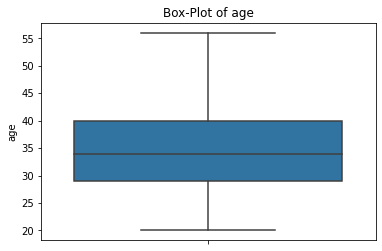

In [751]:
sns.boxplot(y = "age",data=df)
plt.title("Box-Plot of age")
plt.show()

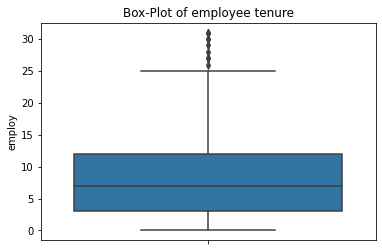

In [752]:
sns.boxplot(y = "employ",data=df)
plt.title("Box-Plot of employee tenure")
plt.show()

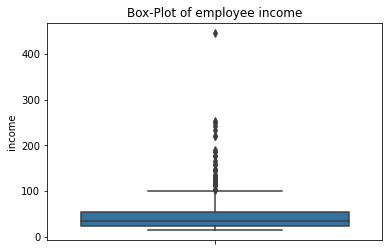

In [753]:
sns.boxplot(y = "income",data=df)
plt.title("Box-Plot of employee income")
plt.show()

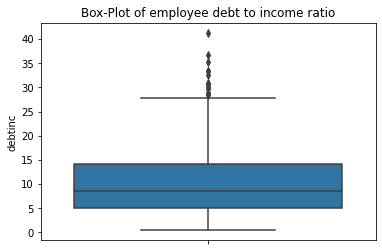

In [754]:
sns.boxplot(y = "debtinc",data=df)
plt.title("Box-Plot of employee debt to income ratio")
plt.show()

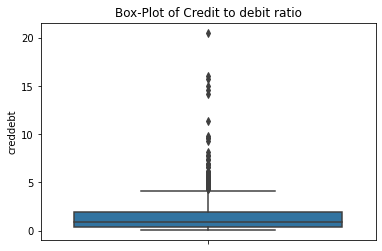

In [755]:
sns.boxplot(y = "creddebt",data=df)
plt.title("Box-Plot of Credit to debit ratio")
plt.show()

In [756]:
#Dealing with outlier
def outlier_capping(x):
    """A funtion to remove and replace the outliers for numerical columns"""
    x = x.clip(upper=x.quantile(0.95))
    
    return(x)

In [757]:
#outlier treatment
df = df.apply(lambda x: outlier_capping(x))

In [758]:
df.describe(percentiles=[.25,0.5,0.75,0.90,0.95])

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.711429,1.715714,8.209643,8.112857,43.095714,10.042286,1.382384,2.845322,0.261429
std,7.690146,0.906523,6.216852,6.411060,25.967091,6.234776,1.386117,2.504717,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
90%,46.000000,3.000000,18.000000,18.000000,82.000000,19.610000,3.621504,7.036180,1.000000
95%,49.000000,4.000000,21.002500,22.000000,113.000000,23.800000,5.090913,9.498963,1.000000
max,49.000000,4.000000,21.050000,22.000000,113.000000,23.800000,5.098264,9.501648,1.000000


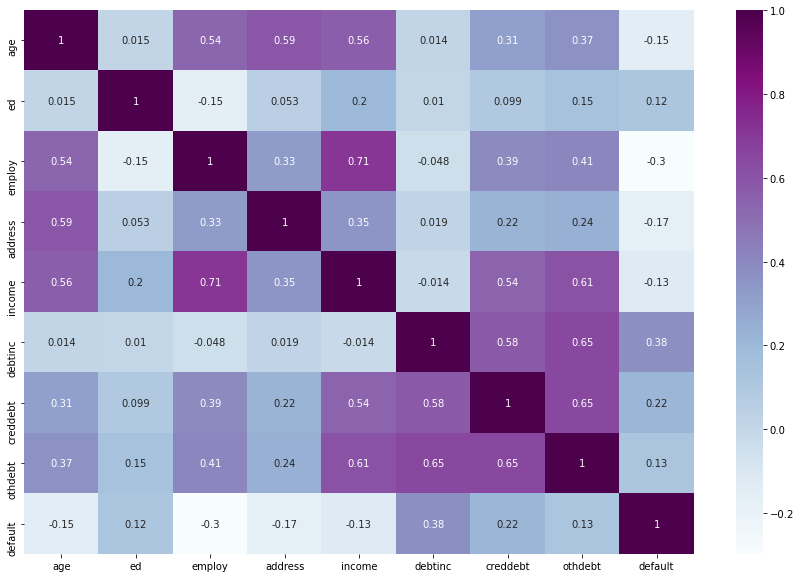

In [759]:
# checking correlation
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [760]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Indicate which variables to compute VIF
X = df[['age','ed','employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]
# add intercept
X['intercept'] = 1
# Compute VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,age,2.069008
1,ed,1.292872
2,employ,2.624197
3,address,1.549227
4,income,5.908874
5,debtinc,5.049334
6,creddebt,2.928049
7,othdebt,5.340459
8,intercept,41.554332


In [761]:
## performing the independent t test on numerical variables

tstats_df = pd.DataFrame()

for i in df:
    tstats = stats.ttest_ind(df.loc[df["default"] == 1,i],df.loc[df["default"] == 0, i],equal_var=False)
    temp = pd.DataFrame([i, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)
tstats_df

,Variable Name,T-Statistic,P-Value
0,default,inf,0
1,debtinc,9.95554,3.85688e-20
2,employ,-9.03873,7.73766e-18
3,creddebt,5.20625,3.90256e-07
4,address,-4.82342,2.07201e-06
5,age,-3.83057,0.0001557
6,income,-3.51615,0.000495008
7,othdebt,3.13998,0.00186546
8,ed,3.02788,0.00267847


## Exploratory Data Analysis

In [762]:
df.groupby('default').mean()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,,
0.0,35.390716,1.651838,9.308704,8.752418,45.032882,8.629207,1.202825,2.658606
1.0,32.792350,1.896175,5.104645,6.306011,37.622951,14.034426,1.889663,3.372819


0.0    517
1.0    183
Name: default, dtype: int64


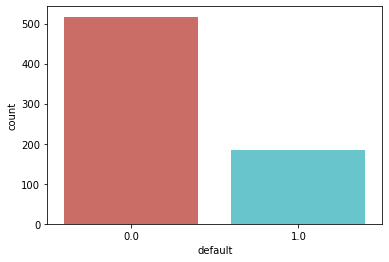

In [763]:
print(df['default'].value_counts())
sns.countplot(x='default',data=df, palette='hls')
plt.show()

In [764]:
#Analyze the impact of features on the target variable
def BivariateAnalysisPlot(segment_by):
    
    #boxplot
    plt.figure(figsize=(10,8))
    sns.boxplot(x = 'default', y = segment_by, data=df)
    plt.title("Box plot of "+segment_by)
    
    
    plt.show()

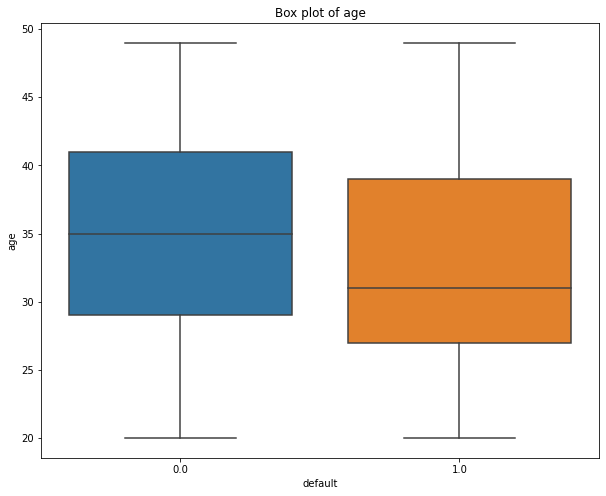

In [765]:
BivariateAnalysisPlot("age")

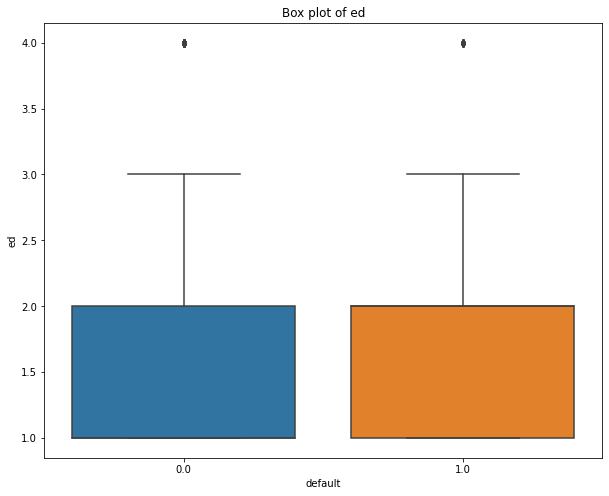

In [766]:
BivariateAnalysisPlot("ed")

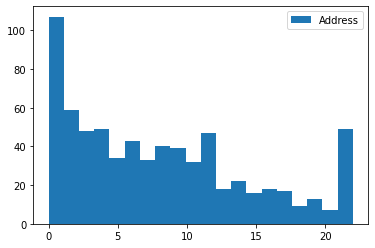

In [767]:
plt.hist(df.address,bins=20,label=['Address'])
plt.legend()

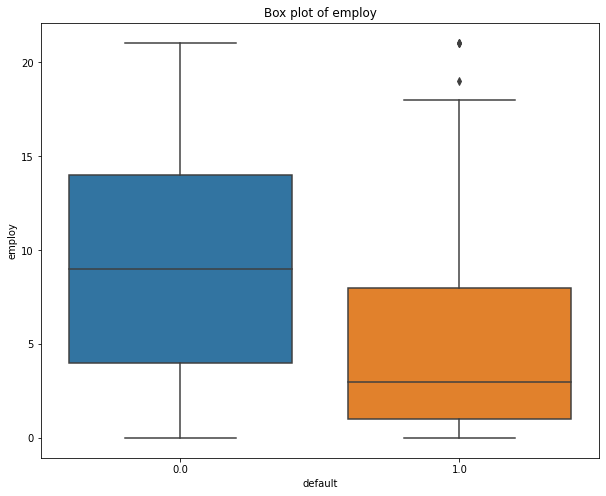

In [768]:
BivariateAnalysisPlot("employ")

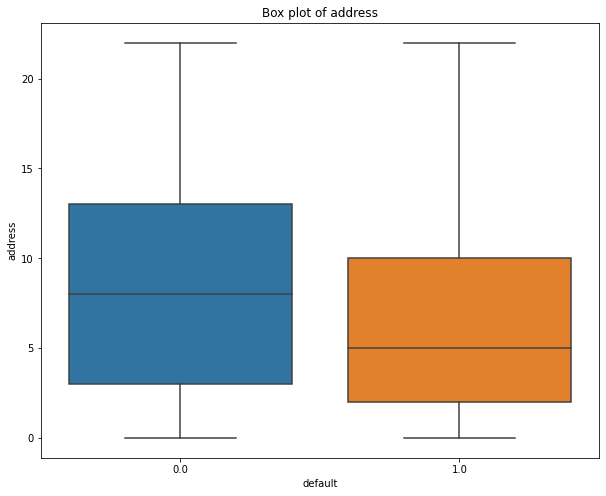

In [769]:
BivariateAnalysisPlot("address")

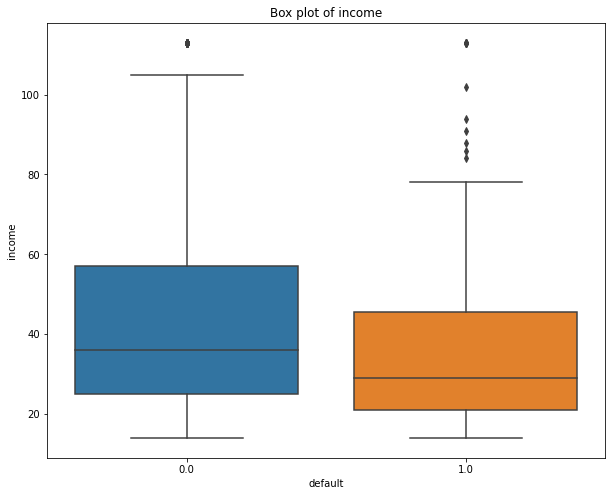

In [770]:
BivariateAnalysisPlot("income")

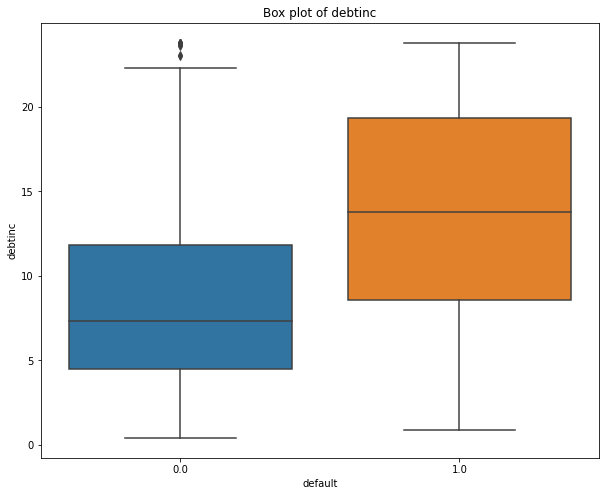

In [771]:
BivariateAnalysisPlot("debtinc")

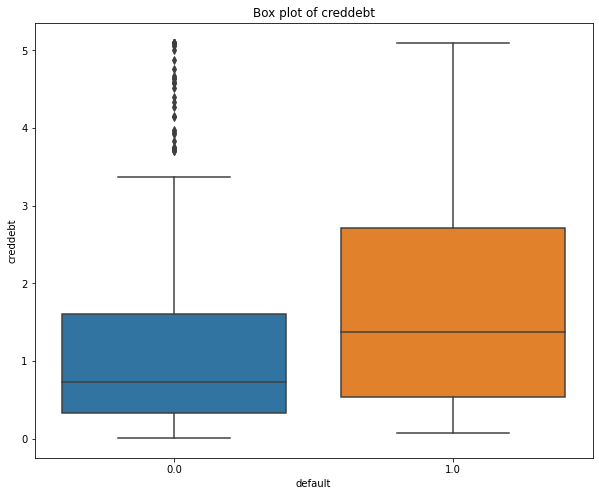

In [772]:
BivariateAnalysisPlot("creddebt")

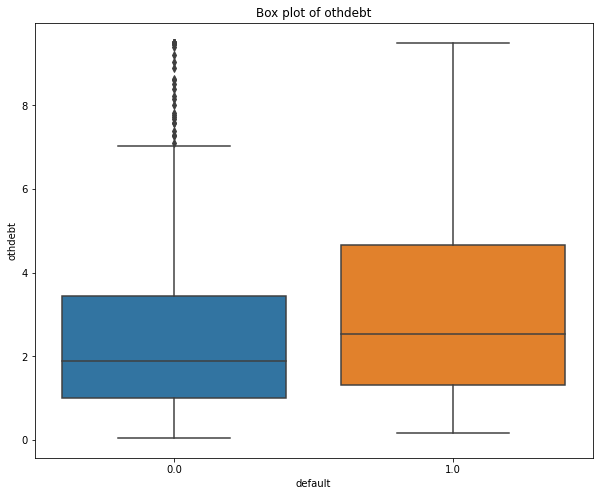

In [773]:
BivariateAnalysisPlot("othdebt")

In [774]:
df.shape

(700, 9)

### Observations
- There are 850 observations and 9 features in the data set
- Removed missing values
- Now data has 850 observations and 9 features
- Out of 850 customers data, 700 are existing customers and 150 are new customers
- The data is highly imbalanced
- From VIF check and T test, found out that the correlation between the variables is within the acceptable limits

## SMOTE

In [775]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [776]:
X=df[['age','ed', 'employ', 'address', 'income', 'debtinc', 'creddebt','othdebt']]
y=df['default']
print('shape of x: {}'.format(X.shape))
print('shape of y: {}'.format(y.shape))

shape of x: (700, 8)
shape of y: (700,)


In [777]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [778]:
!pip install imblearn

In [779]:
print("Before OverSampling, counts of default '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of default '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 123) 
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train) 

print('After OverSampling, the shape of x_train: {}'.format(x_train_sm.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of default '1': 147
Before OverSampling, counts of default '0': 413 

After OverSampling, the shape of x_train: (826, 8)
After OverSampling, the shape of y_train: (826,) 

After OverSampling, counts of label '1': 413
After OverSampling, counts of label '0': 413


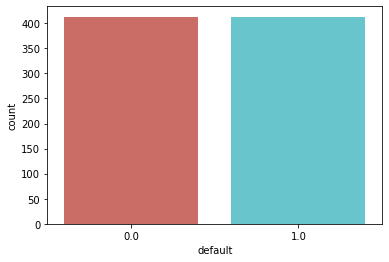

In [780]:
sns.countplot(y_train_sm,data=df, palette='hls')

## Model Selection

#### Logistic Regression

In [781]:
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    sm = SMOTE(random_state = 123) 
    x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train) 
    model.fit(x_train_sm, y_train_sm)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x_train_sm, y_train_sm, cv=5)
    print("Cross validation is",np.mean(score)*100)
    
    print("Before OverSampling, counts of default '1': {}".format(sum(y_train == 1))) 
    print("Before OverSampling, counts of default '0': {} \n".format(sum(y_train == 0))) 
    
    print('After OverSampling, the shape of x_train: {}'.format(x_train_sm.shape)) 
    print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape)) 
  
    print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

In [782]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model, X, y)

Accuracy is 76.42857142857142
Cross validation is 76.2701715954728
Before OverSampling, counts of default '1': 147
Before OverSampling, counts of default '0': 413 

After OverSampling, the shape of x_train: (826, 8)
After OverSampling, the shape of y_train: (826,) 

After OverSampling, counts of label '1': 413
After OverSampling, counts of label '0': 413


In [783]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 67.85714285714286
Cross validation is 77.84738955823293
Before OverSampling, counts of default '1': 147
Before OverSampling, counts of default '0': 413 

After OverSampling, the shape of x_train: (826, 8)
After OverSampling, the shape of y_train: (826,) 

After OverSampling, counts of label '1': 413
After OverSampling, counts of label '0': 413


In [784]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 81.42857142857143
Cross validation is 83.65899963490327
Before OverSampling, counts of default '1': 147
Before OverSampling, counts of default '0': 413 

After OverSampling, the shape of x_train: (826, 8)
After OverSampling, the shape of y_train: (826,) 

After OverSampling, counts of label '1': 413
After OverSampling, counts of label '0': 413


In [785]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
classify(model, X, y)

Accuracy is 77.14285714285715
Cross validation is 84.38700255567726
Before OverSampling, counts of default '1': 147
Before OverSampling, counts of default '0': 413 

After OverSampling, the shape of x_train: (826, 8)
After OverSampling, the shape of y_train: (826,) 

After OverSampling, counts of label '1': 413
After OverSampling, counts of label '0': 413


In [786]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
classify(model, X, y)

Accuracy is 80.71428571428572
Cross validation is 69.37568455640745
Before OverSampling, counts of default '1': 147
Before OverSampling, counts of default '0': 413 

After OverSampling, the shape of x_train: (826, 8)
After OverSampling, the shape of y_train: (826,) 

After OverSampling, counts of label '1': 413
After OverSampling, counts of label '0': 413


In [787]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=123), {
    'n_estimators': [1,5,10,20,50,70,100,120,150,200,220],
    'max_depth': [4, 7, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}, cv=5, return_train_score=False)
clf.fit(x_train_sm, y_train_sm)
clf.cv_results_

{'mean_fit_time': array([ 9.40046310e-03,  1.66008472e-02,  2.84016132e-02,  5.20030022e-02,
         1.20806885e-01,  1.66409540e-01,  2.36613464e-01,  2.81416035e-01,
         3.49819994e-01,  4.80427551e-01,  5.09429169e-01,  7.20043182e-03,
         1.66009903e-02,  2.80015945e-02,  5.12029648e-02,  1.19806862e-01,
         1.66209459e-01,  2.34613371e-01,  2.81016016e-01,  3.63420773e-01,
         4.66426563e-01,  5.22629929e-01,  7.60045052e-03,  1.68010712e-02,
         2.82017231e-02,  5.08028984e-02,  1.20206881e-01,  1.66809607e-01,
         2.36013556e-01,  2.81216097e-01,  3.50620079e-01,  4.65226650e-01,
         5.10429239e-01,  7.60059357e-03,  1.64009571e-02,  2.78016567e-02,
         5.10028839e-02,  1.20206881e-01,  1.66209316e-01,  2.52814531e-01,
         2.80215931e-01,  3.49620056e-01,  4.63826513e-01,  5.10229206e-01,
         7.40041733e-03,  1.66010380e-02,  2.86016941e-02,  5.06029606e-02,
         1.20006895e-01,  1.66409683e-01,  2.35213566e-01,  2.82016134e

In [788]:
df1 = pd.DataFrame(clf.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009400,0.002059,0.003400,4.898235e-04,4,1,2,1,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.668675,0.703030,0.709091,0.690909,0.690909,0.692523,0.013848,493
1,0.016601,0.000800,0.004200,3.999472e-04,4,1,2,5,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.746988,0.769697,0.812121,0.763636,0.806061,0.779701,0.025196,361
2,0.028402,0.000800,0.005200,4.000187e-04,4,1,2,10,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.753012,0.751515,0.787879,0.781818,0.800000,0.774845,0.019351,408
3,0.052003,0.000633,0.006600,4.899014e-04,4,1,2,20,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.771084,0.775758,0.775758,0.775758,0.812121,0.782096,0.015121,351
4,0.120807,0.000748,0.012601,1.743570e-03,4,1,2,50,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.753012,0.763636,0.769697,0.769697,0.812121,0.773633,0.020187,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.266415,0.016979,0.022001,6.324097e-04,30,5,10,100,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.777108,0.812121,0.812121,0.806061,0.842424,0.809967,0.020774,248
491,0.307218,0.011409,0.025001,9.536743e-08,30,5,10,120,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.777108,0.818182,0.824242,0.806061,0.842424,0.813604,0.021696,187
492,0.376022,0.001096,0.030602,4.898235e-04,30,5,10,150,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.771084,0.812121,0.830303,0.812121,0.842424,0.813611,0.024173,181
493,0.498628,0.001497,0.039202,3.999949e-04,30,5,10,200,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.795181,0.818182,0.830303,0.824242,0.836364,0.820854,0.014196,118


In [789]:
df1[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
0,4,1,2,1,0.692523
1,4,1,2,5,0.779701
2,4,1,2,10,0.774845
3,4,1,2,20,0.782096
4,4,1,2,50,0.773633
...,...,...,...,...,...
490,30,5,10,100,0.809967
491,30,5,10,120,0.813604
492,30,5,10,150,0.813611
493,30,5,10,200,0.820854


In [790]:
clf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 70}

In [791]:
clf.best_score_

0.839014238773275

In [792]:
clf.score(x_test,y_test)

0.8071428571428572

[[90 14]
 [13 23]]


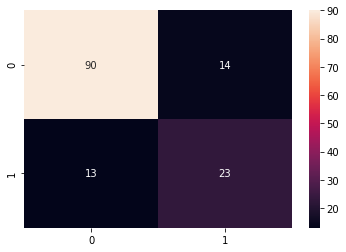

In [793]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [794]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       104
         1.0       0.62      0.64      0.63        36

    accuracy                           0.81       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.81      0.81      0.81       140



In [795]:
 print ('Best auc on training set: ', clf.best_score_)
 print ('Best auc on test set: ', clf.score(x_test, y_test))

Best auc on training set:  0.839014238773275
Best auc on test set:  0.8071428571428572




87,64

Best auc on training set:  0.839014238773275
Best auc on test set:  0.8071428571428572